# Titanic Dataset:
https://www.kaggle.com/c/titanic/data


¿Para que nos sirve cada uno de los imports que hacemos?

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Bases de datos necesarias: *titanic_train y titanic_test*

In [6]:
df = pd.read_csv('titanic_train.csv', header = 0, dtype={'Age': np.float64})

# Procesado de los datos

Recordemos primero los **problemas** con los que nos podemos encontrar en una base de datos:


1.   Valores Nan
2.   Valores categóricos

En el ejercicio que se presenta a contincuación será necesario enfrentarse a estas situaciones para poder pasar los datos correctos al algoritmo.
¿Cuáles son los distintos métodos que hemos trabajado para poder solventar estas situaciones?



## ¿Con que tipo de información vamos a trabajar?

A partir de la información subministrada por ***df.info()***; ¿Qué variables deben ser modificadas? ¿Porque razón? ¿ Qué métodos podemos emplear?



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Si queremos ver únicamente los primeros valores que hay en una base de datos ejecutamos:
df.head()
#Recordemos la importancia de visualizar la tabla, para poder ver de una manera clara como está estructurada la información

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#¿Cuántas filas tiene nuestra base de datos?
df.shape[0]

891

## Transformaciones

### Datos categóricos

Podemos hacer transformaciones binarias

**SEXO**

In [10]:
df['Sex'] = df['Sex'].map({'male': 0, 'female':1})

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


**TICKET**
Para transformar también debemos comprender los datos con los que trabajamos.

In [12]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [13]:
df['Ticket'] = df['Ticket'].map(lambda k: k[0])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,P,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,S,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,1,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,3,8.0500,NaN,S


¿Que hace la siguiente función?¿Para qué nos puede servir?

In [14]:
def encode_label(df):
    return df.astype('category').cat.codes

In [15]:
df['Ticket'].value_counts()

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket, dtype: int64

In [16]:
df['Ticket'] = df['Ticket'].replace(['A','W','F','L','5','6','7','8','9'], '4')
df['Ticket'].value_counts()

3    301
2    183
1    146
4     84
P     65
S     65
C     47
Name: Ticket, dtype: int64

In [17]:
df['Ticket'] = encode_label(df['Ticket'])
df['Ticket'].value_counts()

2    301
1    183
0    146
3     84
5     65
6     65
4     47
Name: Ticket, dtype: int64

In [18]:
df['Ticket'].value_counts()

2    301
1    183
0    146
3     84
5     65
6     65
4     47
Name: Ticket, dtype: int64

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,3,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,5,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,6,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,2,8.0500,NaN,S


Mientras que en las situaciones numéricas como se ha visto anteriormente si que es posible resolver los valores que nos faltan mirando resultados comunes, en sitaciones categoricas es más distinto. Una situación por ejemplo a la que nos enfrentamos es la de la cabina.

In [20]:
df['Cabin'].isnull().sum(axis=0)

687

In [21]:
#En este caso vamos a decantarnos por eliminar aquellas columnas sobrantes
df = df.drop(labels=['Cabin'], axis=1)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,3,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,5,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,6,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,2,8.0500,S


**EMBARKED**

La variable **Embarked** nos indica el puerto en que nuestros pasajeros embarcaron

In [23]:
#Hay algún valor nulo?
df['Embarked'].isna().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [24]:
#¿Cuántos muestras de cada clase tenemos?
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
#Podemos plantear dos situaciones; podríamos llenar los huecos con el valor más común, dado que solo son 2 los valores que nos faltan. O podríamos eliminar estas filas.
#Emplea el método que más te guste.
df['Embarked'].fillna("S", inplace=True)

In [26]:
df['Embarked'].isna().value_counts()

False    891
Name: Embarked, dtype: int64

In [27]:
#Finalmente; es importante tener en cuenta de que se trata de un valor categórico, razón por la cual debemos trasformarlo a una clase numérica. 0,1,2.
#Pista: anteriormente hemos definido una función que realiza esta tarea, úsala aquí también.
df['Embarked'] = encode_label(df['Embarked'])

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,3,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,5,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,6,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,2,8.0500,2


**NAME: NOMBRE**
¿Qué opciones tenemos con el nombre?

Una variable como el nombre puede darnos mucha más información de la que pueda parecer a simple vista. Por ejemplo los títulos noviliarios suelen ser añadidos al nombre. Ante esta situación poemos extraer nuevos datos. A simple vista sinó el nombre en si no nos aporta información ya que es una variable única para cada pasajero

In [29]:
#¿Cómo está estructurado el nombre? ¿Dónde se encuentra la información que nos interesa?
df['Title'] = df['Name'].map(lambda z: z.split(",")[1].split(".")[0])
df['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: Title, dtype: int64

In [30]:
#En el paso anterior nos hemos quedado con variables categóricas; ¿Cómo las transformamos a numéricas?
df['Title'] = encode_label(df['Title'])
df['Title'].value_counts()

11    517
8     182
12    125
7      40
3       7
14      6
9       2
6       2
1       2
16      1
0       1
13      1
15      1
5       1
10      1
2       1
4       1
Name: Title, dtype: int64

In [31]:
#El método presentado pordría ser una opción; sin embargo da lugar a muchas clases.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,3,7.2500,2,11
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,5,71.2833,0,12
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,6,7.9250,2,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0,53.1000,2,12
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,2,8.0500,2,11


In [32]:
#Otra opción sería clasificarlos por clases
def get_titles(df):
    title_dictionary = {
        "Capt": "Officer",
        "Col": "Officer",
        "Major": "Officer",
        "Jonkheer": "Royalty",
        "Don": "Royalty",
        "Dona": "Royalty",
        "Sir": "Royalty",
        "Dr": "Officer",
        "Rev": "Officer",
        "the Countess": "Royalty",
        "Mme": "Mrs",
        "Mlle": "Miss",
        "Ms": "Mrs",
        "Mr": "Mr",
        "Mrs": "Mrs",
        "Miss": "Miss",
        "Master": "Master",
        "Lady": "Royalty"
    }
    # print(df['Name'])

    def process_name(x):
        # print(x)
        return x.split(',')[1].split('.')[0].strip()

    df['Title'] = df['Name'].map(process_name)
    df['Title'] = df.Title.map(title_dictionary)
    # print(df['Name'][df['Title'].isna()])

    return df

In [33]:
#De esta manera nos quedamos únicamente con cinco grupos.
df = get_titles(df)
df['Title'] = df['Title'].map({'Officer': 0, 'Royalty': 1, 'Mrs': 2, 'Miss': 3, 'Master': 4, 'Mr': 5}).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,3,7.2500,2,5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,5,71.2833,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,6,7.9250,2,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,2,8.0500,2,5


In [34]:
#Como hemos comentado anteriormente la variable nombre por si sola no nos interesa, por lo cual deberemos eliminarla
df.drop(labels=['Name'], axis=1, inplace=True)

In [35]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,3,7.2500,2,5
1,2,1,1,1,38.0,1,0,5,71.2833,0,2
2,3,1,3,1,26.0,0,0,6,7.9250,2,3
3,4,1,1,1,35.0,1,0,0,53.1000,2,2
4,5,0,3,0,35.0,0,0,2,8.0500,2,5


### Datos numéricos

**FARE: TARIFA**


*   ¿Variable numérica o categórica?
*   Tenemos missing values? ¿Qué método puedo emplear para substituirlos?




In [36]:
# Tenemos valores numéricos?
df['Fare'].isna().value_counts()

False    891
Name: Fare, dtype: int64

In [39]:
# ¿Cómo es la fila en la que me falta el valor?
na_fare = df[df['Fare'].isna()]
na_fare

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title


In [38]:
print(na_fare['Ticket'].values[0])


IndexError: ignored

In [ ]:
#En este caso particular se quiere emplear la media para poder llenar el hueco. Por elección individual, creo que Ticket, Pclass y Embarked son variables interesantes que
#definen el tipo de persona que adquiere ese ticket, por lo tanto su coste. Cual es el valor medio del ticket para aquellos pasajeros que cumplen las mismas condiciones
#que nosotros?
media = df['Fare'].loc[ (df['Ticket'] == na_fare['Ticket'].values[0]) &
                            (df['Pclass'] == na_fare['Pclass'].values[0]) &
                            (df['Embarked'] == na_fare['Embarked'].values[0])].mean()
media

12.072079522184305

In [ ]:
#Y si en lugar del valor medio usamos la mediana? ¿Cuál de los dos será mejor y porque?
guess_Fare = df['Fare'].loc[ (df['Ticket'] == na_fare['Ticket'].values[0]) &
                            (df['Pclass'] == na_fare['Pclass'].values[0]) &
                            (df['Embarked'] == na_fare['Embarked'].values[0])].median()
guess_Fare

8.05

In [ ]:
#Llena los huecos con el valor que creas más conveniente
df['Fare'].fillna(guess_Fare , inplace=True)

In [ ]:
#Comprobamos que no nos queden huecos
df['Fare'].isna().value_counts()

False    1309
Name: Fare, dtype: int64

Es cierto que hemos trabajado con valore categoricos en los que es imprescindible poder cambiarlos a clases numéricas, por ejemplo. Sin embargo hay situaciones en las que un rango de valores numéricos también es interesante poderlos transformar en clases de tal manera que tengamos agrupaciones.

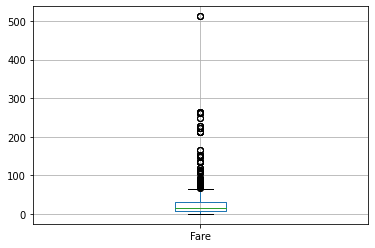

In [ ]:
#Puede observarse mediante un gráfico la distribución de los datos. ¿Qué información podemos extraer?¿Nos permite esta representación una división de los datos?
df.boxplot('Fare')

In [ ]:
df['Fare'].describe()

count    1309.000000
mean       33.276193
std        51.743584
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [ ]:
df['Fare-bin'] = pd.qcut(df.Fare,5,labels=[1,2,3,4,5]).astype(int)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fare-bin
0,1,0,3,0,22.0,1,0,3,7.2500,2,5,1
1,2,1,1,1,38.0,1,0,5,71.2833,0,2,5
2,3,1,3,1,26.0,0,0,6,7.9250,2,3,2
3,4,1,1,1,35.0,1,0,0,53.1000,2,2,5
4,5,0,3,0,35.0,0,0,2,8.0500,2,5,2


**PassengerID**

In [ ]:
#¿Nos indica algo?¿Podemos eliminarla?
df.drop('PassengerId',axis= 1, inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fare-bin
0,0,3,0,22.0,1,0,3,7.2500,2,5,1
1,1,1,1,38.0,1,0,5,71.2833,0,2,5
2,1,3,1,26.0,0,0,6,7.9250,2,3,2
3,1,1,1,35.0,1,0,0,53.1000,2,2,5
4,0,3,0,35.0,0,0,2,8.0500,2,5,2


**EDAD**

In [ ]:
#¿Tenemos valores nulos?
df['Age'].isna().value_counts()

False    1046
True      263
Name: Age, dtype: int64

Otra manera de llenar los huecos no es solo haciendo la media sino empleando un algortimo por si mismo para poder predecir estos valores nulos.

In [41]:
# Importamos la clase RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [42]:
#¿Qué variables nos interesan para tener en cuenta?
df_sub = df[['Age','Title','Fare','SibSp']]

In [44]:
#Para poder entrenar el modelo y comprobar que funciona adecuadamente para aplicarlo a los datos desconocidos debemos:
# 1. eliminar aquellas filas nulas de los datos de entrenamiento
# 2. guardar en test las filas nulas.
X_train  = df_sub.dropna().drop('Age', axis=1)
y_train  = df['Age'].dropna()

X_test = df_sub.loc[np.isnan(df.Age)].drop('Age', axis=1)

In [45]:
# Aplicamos el algortimo
# Para ello creamos una instancia de RandomForestRegresor
regressor = RandomForestRegressor(n_estimators = 300)
# La función fit() nos permite entrenar el modelo, ajustados pesos dependiendo de los datos
regressor.fit(X_train, y_train)
# Una vez entrenado el modelo, este está listo para hacer predicciones, lo que se realiza mediante el método predict()
y_pred = np.round(regressor.predict(X_test),1)
y_pred

array([27. , 31.6, 29.9, 32.3, 21.8, 27.8, 31.5, 26.1, 24.8, 27.8, 30.8,
       36.7, 26.1, 25.9, 38.8, 35.4,  6. , 27.8, 30.8, 21.9, 30.8, 30.8,
       27.8, 30.1,  5.3, 30.8, 42.2,  4.8, 30.7, 30.8, 25.8,  9.6, 39.1,
       39.8,  6.5, 16. , 29.4, 58. , 31.3, 42.2, 26.1, 15.9, 29.4, 27.8,
        5.6, 21.5, 15.1,  7.8, 30.8, 53. , 42.2, 26.1, 44.3, 26.1, 35. ,
       39.8, 35.4, 42.8, 26.1, 25.2, 21.5, 30.8, 29.1, 15.9,  4.9, 38.7,
       27.8, 28.9, 58.3, 32.3, 21.8, 21.8, 36.7, 29.9, 26.1, 42.7, 27.8,
       24.5,  5.6, 27.8, 25. , 35. , 30.1, 27.8, 30.8, 42.2, 28.9, 23.3,
       19.1, 30.8, 37.6, 42.2, 30.8, 35. , 24.5, 30.8, 46.4, 35. ,  5.6,
       19.1, 30.6, 29.4, 21.2, 48.4, 30.8, 37.5, 32.3, 24.8, 27.5, 24.8,
       35. , 30.9, 43.4, 27.8, 27.5, 42.2, 30.8, 19. , 24.8, 26.1, 24.4,
       25.8, 30.8, 26.1, 13.7, 32.3, 27.8, 36.9, 27.6,  7.8, 42.2, 24.5,
       35. , 27.3, 29.9, 36.3, 27.8, 23.2, 27.8, 30.1, 37.4, 35. , 18.9,
       29.9, 19.2,  6. , 48.4, 32.2, 19.2, 35. , 27

In [46]:
# Sustituimos estos valores en el dataset
df.Age.loc[df.Age.isnull()] = y_pred

<ipython-input-46-8419d658c54e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age.loc[df.Age.isnull()] = y_pred


In [47]:
# Comprobamos si nos quedan valores nulos o no
df.Age.isnull().sum(axis=0)

0

In [48]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,3,7.2500,2,5
1,2,1,1,1,38.0,1,0,5,71.2833,0,2
2,3,1,3,1,26.0,0,0,6,7.9250,2,3
3,4,1,1,1,35.0,1,0,0,53.1000,2,2
4,5,0,3,0,35.0,0,0,2,8.0500,2,5


Como se ha comentado anteriormente, tener muchas clases distintas no nos favorece necesariamente. Ante esta situación podemos hacer grupos para poder reducir el número de clases, por ejemplo por rango de edades.

In [ ]:
df['Age-bin'] = df['Age']
df.loc[df['Age-bin'] <= 16, 'Age-bin'] = 0
df.loc[(df['Age-bin'] > 16) & (df['Age-bin'] <= 32), 'Age-bin'] = 1
df.loc[(df['Age-bin'] > 32), 'Age-bin'] = 2

Un aspecto a añadir pueden ser los **dummies** en los cuales en lugar de tener una columna donde aparecen múltiples clases tenemos una columna con cada una de las clases indicando si el elemento de esa fila pertence a la clase '1' o no '0'.

In [49]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
df['Singleton'] = df['FamilySize'].map(lambda s: 1 if s == 1 else 0)
df['SmallFamily'] = df['FamilySize'].map(lambda s: 1 if 2 <= s <= 3 else 0)
df['MediumFamily'] = df['FamilySize'].map(lambda s: 1 if s == 4 else 0)
df['LargeFamily'] = df['FamilySize'].map(lambda s: 1 if 5 <= s else 0)


### Ahora ya tenemos nuestra base de datos lista, por el momento....

In [50]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Singleton,SmallFamily,MediumFamily,LargeFamily
0,1,0,3,0,22.0,1,0,3,7.2500,2,5,2,0,1,0,0
1,2,1,1,1,38.0,1,0,5,71.2833,0,2,2,0,1,0,0
2,3,1,3,1,26.0,0,0,6,7.9250,2,3,1,1,0,0,0
3,4,1,1,1,35.0,1,0,0,53.1000,2,2,2,0,1,0,0
4,5,0,3,0,35.0,0,0,2,8.0500,2,5,1,1,0,0,0


**Para pensar:**


1.   ¿Qué efecto tiene escoger de manera aleatoria el % de datos que van al entrenamiento (train) y a la prueba (test). ¿Cómo afecta nuestro resultado a la accuracy? ¿Qué nos está indicando de los datos?
2. ¿Cuáles son las variables que hemos de tratar para poder usar la base de datos?

